![SolasAI Banner Image](../images/SolasAI-Logo.png)

<br>

# SolasAI NYC Employment Bias Testing

## About

In this notebook we will cover the following:

- Importing Data
- Performing the Analysis
	- Scoring impact ratio
	- Selection impact ratio
- Conclusion

The SolasAI Disparity and Bias Testing Library includes functionality designed to comply with the testing requirements of the New York City Automated Employment Decision Tools ordinance [Local Law 144](https://legistar.council.nyc.gov/LegislationDetail.aspx?ID=4344524&GUID=B051915D-A9AC-451E-81F8-6596032FA3F9
) and accompanying [regulations](https://rules.cityofnewyork.us/wp-content/uploads/2023/04/DCWP-NOA-for-Use-of-Automated-Employment-Decisionmaking-Tools-2.pdf).


*This text and associated software do not represent and should not be construed as providing legal advice or requirements for regulatory compliance.*

In [1]:
import solas_disparity as sd
import pandas as pd
import numpy as np

Certain notebook environments have limited rendering functionality.
Uncomment this cell as a potential workaround if plots are not
displaying.

In [2]:
# import plotly.io as pio
# pio.renderers.default = "png"

# Import Data

In [3]:
data = pd.read_csv('data/employment_data.csv')

In [4]:
data.head()

,Score,Selection,Asian,Black,Hispanic,Native American,Native Hawaiian,Two or More Races,White,Female,Male
0,0.673733,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.411700,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.597939,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.503608,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.928622,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
data.shape

(10000, 11)

We start by reading in a dataset containing information for 10,000 applicants for employment. For each applicant, the dataset includes the results of the automated decision tool and demographic information for each applicant.

Specifically, there is a score between 0 and 1 generated by the automated employment decision tool and whether or not the applicant was "selected." This could mean the applicant was selected for human review of their application, for a first round interview, or any other binary "yes/no" outcome. Here, a 0 means the applicant was not selected to proceed forward in the application process; a 1 means the applicant was selected. In this dataset, anyone who received a score above 0.65 was selected to proceed.

The demographic information here includes the sex of the applicant (Female or Male) and the EEO-1 race/ethnicity categorization of the applicant (Asian, Black, Hispanic, Native American/Alaskan Native, Native Hawaiian or Other Pacific Islander, Two or More Races, or White). These groupings are required under Local Law 144. However, these groupings are not hardcoded into the SolasAI Disparity Library, so any groupings can be used.

# Analysis

Local Law 144 contemplates two different analyses:

**Scoring Impact Ratio.** The scoring impact ratio is used to test for disparity when an automated employment decision tool produces a score that is used to evaluate an applicant.

**Selection Impact Ratio.** The selection impact ratio is used to test for disparity when an automated employment decision tool produces a recommendation, such as 'Qualified' or 'Not Qualified' for an applicant.

This dataset contains both a score and a recommendation, so we will test using both analyses.

## Scoring Impact Ratio

We begin with the scoring impact ratio. To call the function, we pass the dataset, a list of the race and ethnicity columns, the gender columns, and the column containing the automated employment decision tool score. Additional more technical parameters are available. 
* `ratio_threshold` is the value a scoring impact ratio must fall below to be considered practically significant
* `difference_threshold` is the minimum difference in scores to be considered practically significant
* `sample_weight` (optional) sample weights for rows in the dataset
* `drop_small_groups` whether to drop groups that fall below 2% of the population, pursuant to Local Law 144

In [6]:
scoring_ir = sd.scoring_impact_ratio(
    group_data=data,
    race_ethnicity_groups=["White", "Black", "Hispanic", "Asian", "Native Hawaiian", "Native American", "Two or More Races"],
    gender_groups=["Female", "Male"],
    outcome=data['Score'],
    ratio_threshold=0.8,
    difference_threshold=0.0,
    sample_weight=None,
    drop_small_groups=True,
)

The `scoring_ir` object has all the various reporting requirements attached to it. To see them all at once, the following cell can be uncommented. We will examine each report in turn.

In [7]:
# scoring_ir

### Group Counts

We begin by providing the counts of applicants for each demographic group.

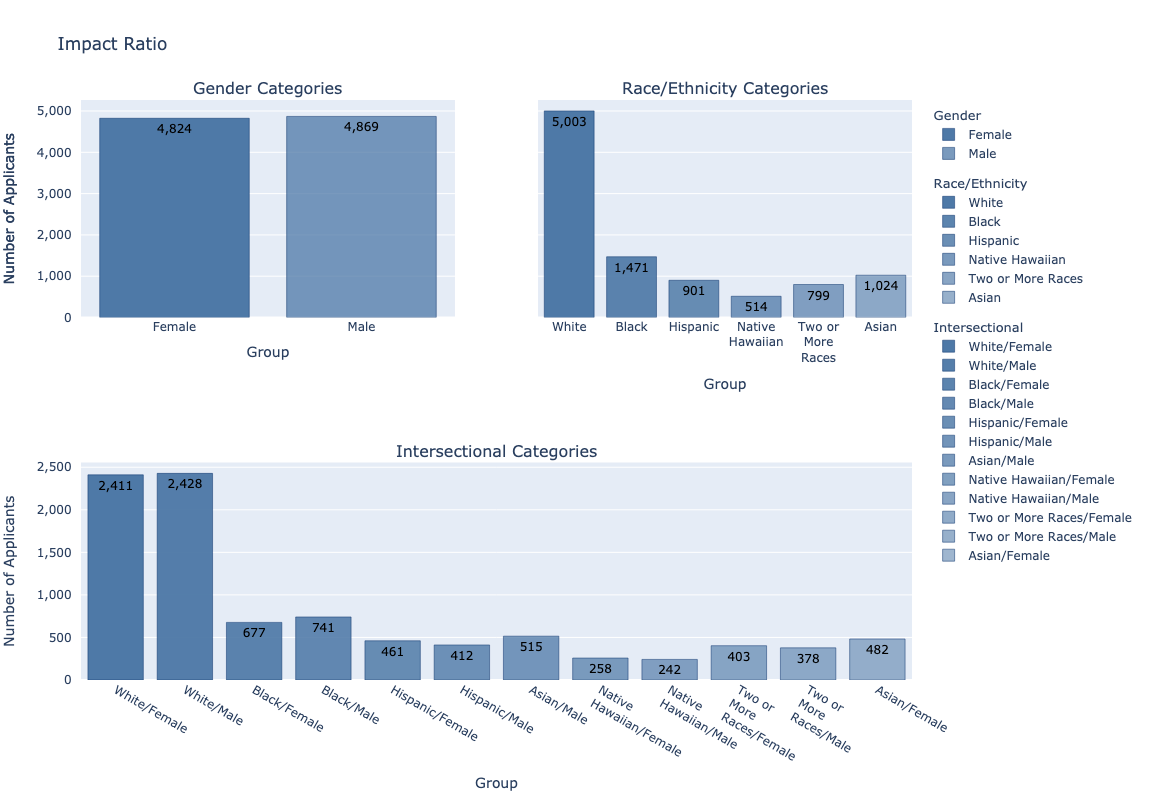

In [8]:
scoring_ir.plot(column="Number of Applicants")

The plot for a single group (gender, race/ethnicity, or intersectional) can also be viewed individually by setting the `group_category`. These are commented out for the sake of brevity in this notebook.

In [9]:
# scoring_ir.plot(column="Number of Applicants", group_category="Gender")
# scoring_ir.plot(column="Number of Applicants", group_category="Race/Ethnicity")
# scoring_ir.plot(column="Number of Applicants", group_category="Intersectional")

Local Law 144 allows for any group falling below 2% of the population to be excluded from the analysis. However, a table showing the number of applicants in each group and their associated scoring rate must be provided. The table is produced below.

In [10]:
scoring_ir.small_group_table

,Number of Applicants,Scoring Rate
Group,,
Native American,100.0,0.43
Native American/Female,48.0,0.50
Native American/Male,50.0,0.38


Local Law 144 also requires a table showing the number of applicants for whom demographic information is unknown.

In [11]:
scoring_ir.unknown_table

,Group Category,Total Unknown
0,Race/Ethnicity,188.0
1,Gender,307.0
2,Intersectional,494.0


### Reports

Local Law 144 requires that a table for the gender analysis, race/ethnicity analysis, and intersectional analysis be provided. Each is produced below.

In [12]:
gender_report, race_ethnicity_report, intersectional_report = scoring_ir.report

In [13]:
gender_report

,Number of Applicants,Number with Score Above Median,Scoring Rate,Impact Ratio
Group,,,,
Female,4824.0,2376.0,0.492537,0.970917
Male,4869.0,2470.0,0.507291,1.000000


In [14]:
race_ethnicity_report

,Number of Applicants,Number with Score Above Median,Scoring Rate,Impact Ratio
Group,,,,
White,5003.0,2610.0,0.521687,0.891832
Black,1471.0,611.0,0.415364,0.710071
Hispanic,901.0,423.0,0.469478,0.802581
Native Hawaiian,514.0,194.0,0.377432,0.645226
Two or More Races,799.0,422.0,0.528160,0.902898
Asian,1024.0,599.0,0.584961,1.000000


In [15]:
intersectional_report

,Number of Applicants,Number with Score Above Median,Scoring Rate,Impact Ratio
Group,,,,
White/Female,2411.0,1227.0,0.508917,0.854698
White/Male,2428.0,1298.0,0.534596,0.897824
Black/Female,677.0,273.0,0.403250,0.677235
Black/Male,741.0,315.0,0.425101,0.713933
Hispanic/Female,461.0,213.0,0.462039,0.775968
Hispanic/Male,412.0,200.0,0.485437,0.815263
Asian/Male,515.0,294.0,0.570874,0.958750
Native Hawaiian/Female,258.0,103.0,0.399225,0.670475
Native Hawaiian/Male,242.0,84.0,0.347107,0.582947


Each report is a pandas dataframe that can easily be saved using pandas functions.

In [16]:
# gender_report.to_csv('gender_report.csv')
# race_ethnicity_report.to_csv('race_ethnicity_report.csv')
# intersectional_report.to_csv('intersectional_report.csv')

# scoring_ir.small_group_table.to_csv('small_group_report.csv')
# scoring_ir.unknown_table.to_csv('unknown_report.csv')

### Plotting

Each of the above report can also be produced as a bar chart. The horizontal dashed line represents the `ratio_threshold` — 0.8 here. The bar for any group that falls below this threshold is hashed to indicate that it s a practically significant result.

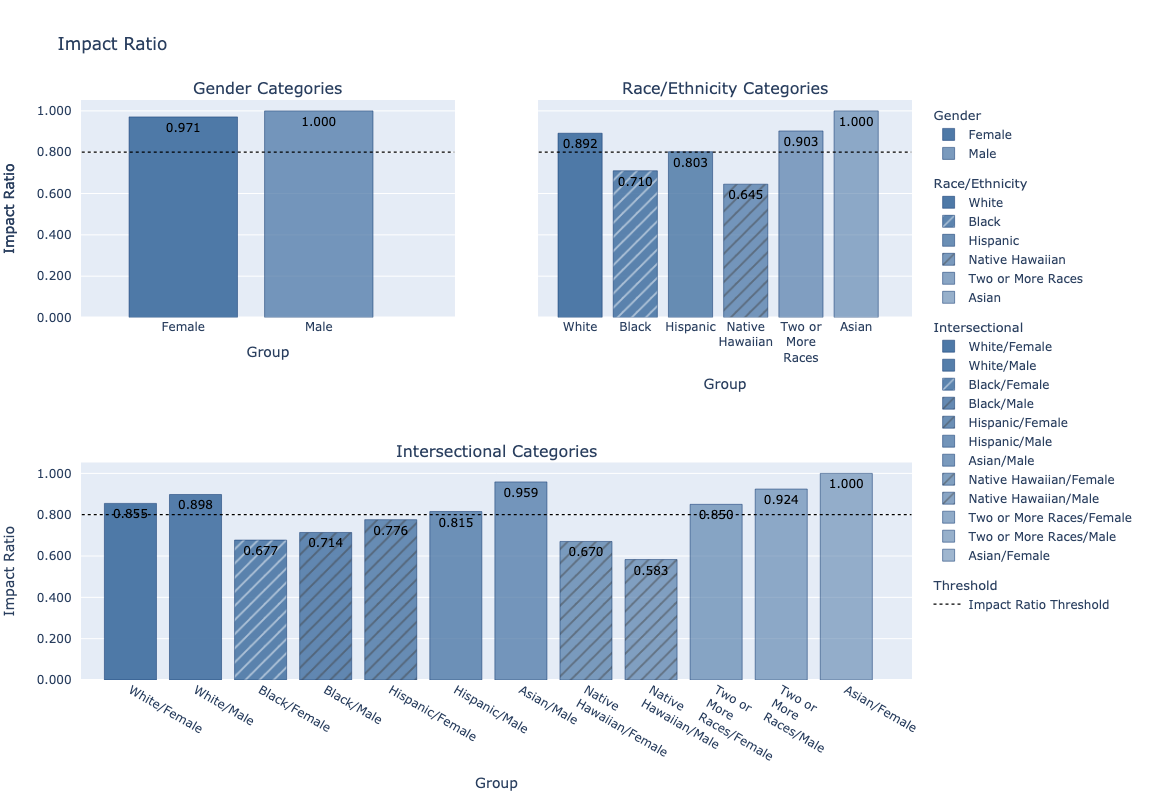

In [17]:
scoring_ir.plot()

Plots can also be viewed individually.

In [18]:
gender_plot, race_ethnicity_plot, intersectional_plot = scoring_ir.plot(separate=True)

# gender_plot
# race_ethnicity_plot
# intersectional_plot

Any plot can be saved by calling `write_image()` on it.

In [19]:
# gender_plot.write_image('scoring_impact_ratio_gender_plot.png')
# race_ethnicity_plot.write_image('scoring_impact_ratio_race_ethnicity_plot.png')
# intersectional_plot.write_image('scoring_impact_ratio_intersectional_plot.png')

### Summary table

A summary table containing more detailed information above and beyond what is required by Local Law 144 is also available. This table includes all information needed to calculate the scoring rate and scoring rate impact ratio in addition to measures of statistical and practical significance. Further explanation of these concepts can be found [here](https://github.com/SolasAI/solas-ai-disparity/blob/main/examples/01_solas-ai-disparity-introduction.ipynb).

In [20]:
# scoring_ir.summary_table

## Selection Impact Ratio

We now turn to the selection impact ratio. To call the function, we pass the dataset, a list of the race and ethnicity columns, the gender columns, and the column containing the automated employment decision tool's recommendation (0 for negative outcome and 1 for a positive outcome, from the perspective of the applicant). Additional more technical parameters are available. 
* `ratio_threshold` is the value a scoring impact ratio must fall below to be considered practically significant
* `difference_threshold` is the minimum difference in scores to be considered practically significant
* `sample_weight` (optional) sample weights for rows in the dataset
* `drop_small_groups` whether to drop groups that fall below 2% of the population, pursuant to Local Law 144

In [21]:
selection_ir = sd.selection_impact_ratio(
    group_data=data,
    race_ethnicity_groups=["White", "Black", "Hispanic", "Asian", "Native Hawaiian", "Native American", "Two or More Races"],
    gender_groups=["Female", "Male"],
    outcome=data['Selection'],
    ratio_threshold=0.8,
    difference_threshold=0.0,
    sample_weight=None,
    drop_small_groups=True,
)

The `selection_ir` object has all the various reporting requirements attached to it. To see them all at once, the following cell can be uncommented. We will examine each report in turn.

In [22]:
#selection_ir

### Group Counts

As above, the counts of applicants for each demographic group can be shown together or separately.

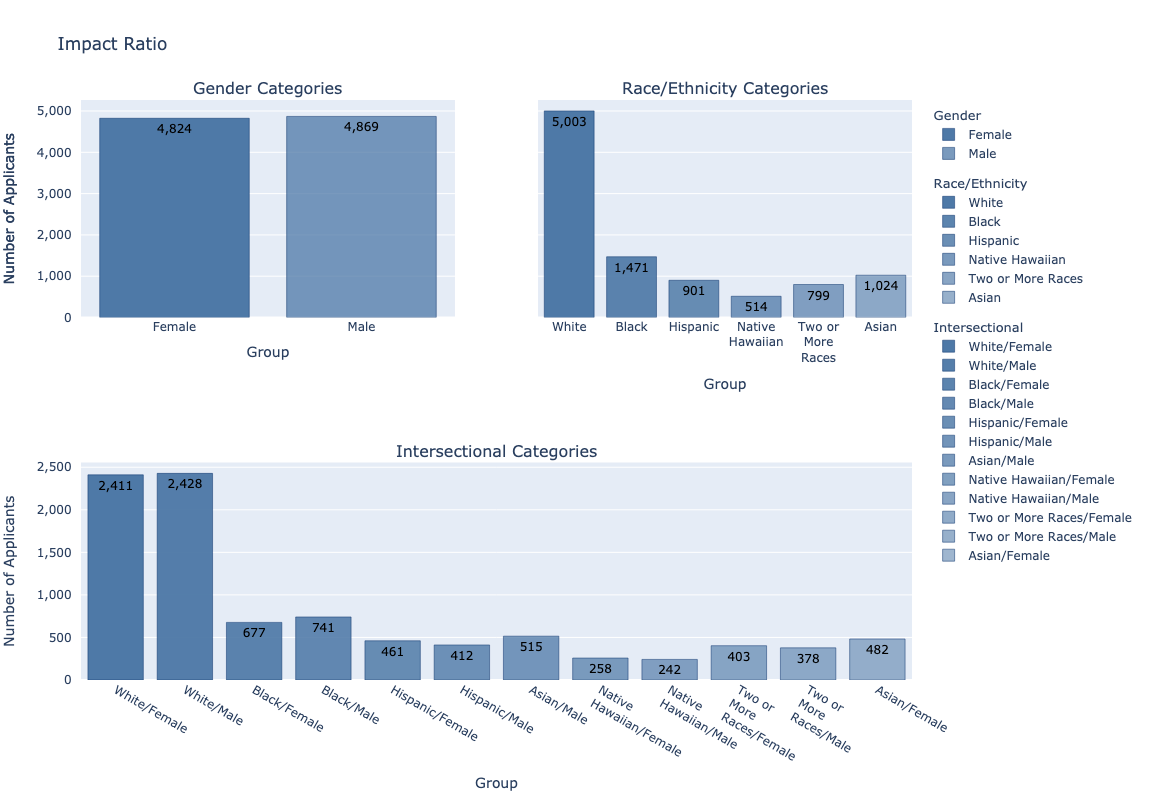

In [23]:
selection_ir.plot(column="Number of Applicants")

# selection_ir.plot(column="Number of Applicants", group_category="Gender")
# selection_ir.plot(column="Number of Applicants", group_category="Race/Ethnicity")
# selection_ir.plot(column="Number of Applicants", group_category="Intersectional")

Local Law 144 allows for any group falling below 2% of the population to be excluded from the analysis. However, a table showing the number of applicants in each group and their associated scoring rate must be provided. The table is produced below.

In [24]:
selection_ir.small_group_table

,Number of Applicants,Selection Rate
Group,,
Native American,100.0,0.320000
Native American/Female,48.0,0.354167
Native American/Male,50.0,0.300000


Local Law 144 also requires a table showing the number of applicants for whom demographic information is unknown. An individual's demographic information is unknown if all race/ethnicity columns are 0s or each gender column contains a 0.

In [25]:
selection_ir.unknown_table

,Group Category,Total Unknown
0,Race/Ethnicity,188.0
1,Gender,307.0
2,Intersectional,494.0


### Reports

Local Law 144 requires that a table for the gender analysis, race/ethnicity analysis, and intersectional analysis be provided. Each is produced below.

In [26]:
gender_report, race_ethnicity_report, intersectional_report = selection_ir.report

In [27]:
gender_report

,Number of Applicants,Number Selected,Selection Rate,Impact Ratio
Group,,,,
Female,4824.0,2162.0,0.448176,0.971147
Male,4869.0,2247.0,0.461491,1.000000


In [28]:
race_ethnicity_report

,Number of Applicants,Number Selected,Selection Rate,Impact Ratio
Group,,,,
White,5003.0,2403.0,0.480312,0.897517
Black,1471.0,558.0,0.379334,0.708828
Hispanic,901.0,383.0,0.425083,0.794316
Native Hawaiian,514.0,140.0,0.272374,0.508961
Two or More Races,799.0,399.0,0.499374,0.933137
Asian,1024.0,548.0,0.535156,1.000000


In [29]:
intersectional_report

,Number of Applicants,Number Selected,Selection Rate,Impact Ratio
Group,,,,
White/Female,2411.0,1121.0,0.464952,0.855370
White/Male,2428.0,1202.0,0.495058,0.910755
Black/Female,677.0,252.0,0.372230,0.684790
Black/Male,741.0,285.0,0.384615,0.707575
Hispanic/Female,461.0,192.0,0.416486,0.766207
Hispanic/Male,412.0,181.0,0.439320,0.808215
Asian/Male,515.0,269.0,0.522330,0.960928
Native Hawaiian/Female,258.0,77.0,0.298450,0.549056
Native Hawaiian/Male,242.0,57.0,0.235537,0.433317


### Plots

We can also view all plots at once.

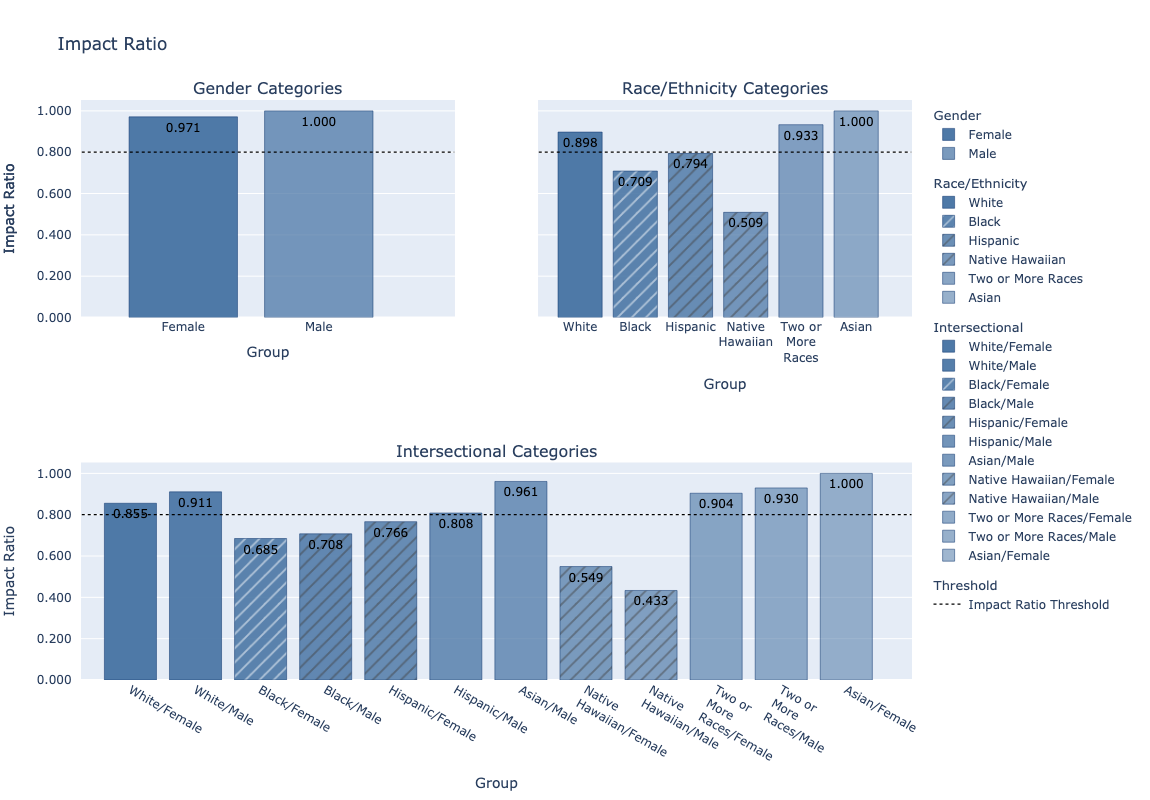

In [30]:
selection_ir.plot()

### Summary table

A summary table containing more detailed information above and beyond what is required by Local Law 144 is also available. This table includes all information needed to calculate the scoring rate and scoring rate impact ratio in addition to measures of statistical and practical significance. Further explanation of these concepts can be found [here](https://github.com/SolasAI/solas-ai-disparity/blob/main/examples/01_solas-ai-disparity-introduction.ipynb).

In [31]:
# selection_ir.summary_table

# Conclusion

The functions included in the SolasAI Disparity and Bias Testing Library have been designed to comply with Local Law 144 and provide all the various reporting requirements of the law while maintaining an easy-to-use interface. With these tools, a user with minimal knowledge of Python will be able to generate full reports in compliance with Local Law 144.